In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#koneksi dar colab ke gdrive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#loading data
path='/content/drive/MyDrive/DataSource/Chapter06DataSet.csv'

load_data_res = pd.read_csv(path)
load_data_res

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


In [ ]:
df = pd.DataFrame(load_data_res)
df.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


## Business Understanding

Sabarudin Hidayah is a program director for a major health insurance provider. Recently she has been reading in medical journals and other articles, and found a strong emphasis on the influence of weight, gender and cholesterol on the development of coronary heart disease. The research she’s read confirms time after time that there is a connection between these three variables, and while there is little that can be done about one’s gender, there are certainly life choices that can be made to alter one’s cholesterol and weight. She begins brainstorming ideas for her company to offer weight and cholesterol management programs to individuals who receive health insurance through her employer. As she considers where her efforts might be most effective, she finds herself wondering if there are natural groups of individuals who are most at risk for high weight and high cholesterol, and if there are such groups, where the natural dividing lines between the groups occur.

problem: clustering, Unsupervised Learning

GOAL : Predictif tingkat resiko jantung koroner dengan model clustung

Algoritma : K-means

#Data Understanding


In [ ]:
df.isna().sum()

Weight         0
Cholesterol    0
Gender         0
cluster        0
dtype: int64

## Analisis Kolestrol

Kolestrol Total : dikatakan baik jika dibawah 200 mg/dL

Kolestrol LDL(jahat) : batas rekomendasi adalah kurang dari 100 mg/dL untuk individu dengan resiko kardiovaskular tinggi, dan kurang dari 130mg/dL untuk individu dengan resiko rendah hingga sedang.

Kolestrol HDL (Baik): kadar makin tinggi lebih baik dengan tingkat lebih dari  mg/dL dianggap menguntungkan

Trigliserida (lemak dalam Darah) : batas yang sehat kurang dari mg/dL

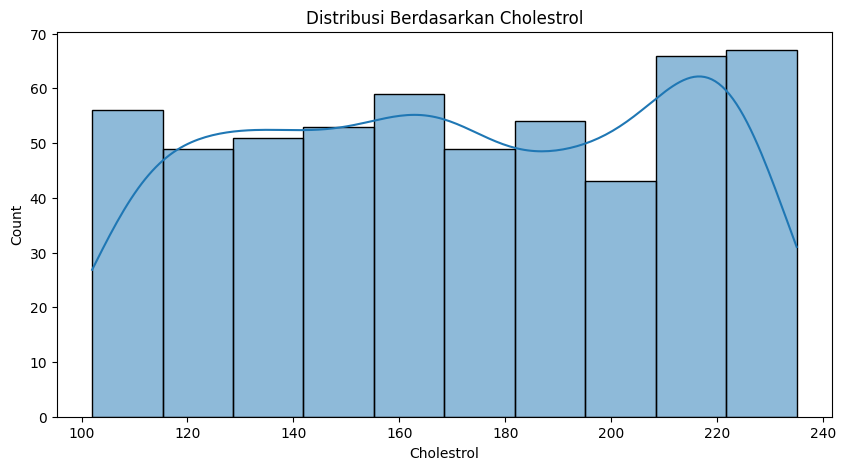

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Cholesterol", kde=True, bins=10)
plt.title("Distribusi Berdasarkan Cholestrol")
plt.xlabel("Cholestrol")
plt.show()

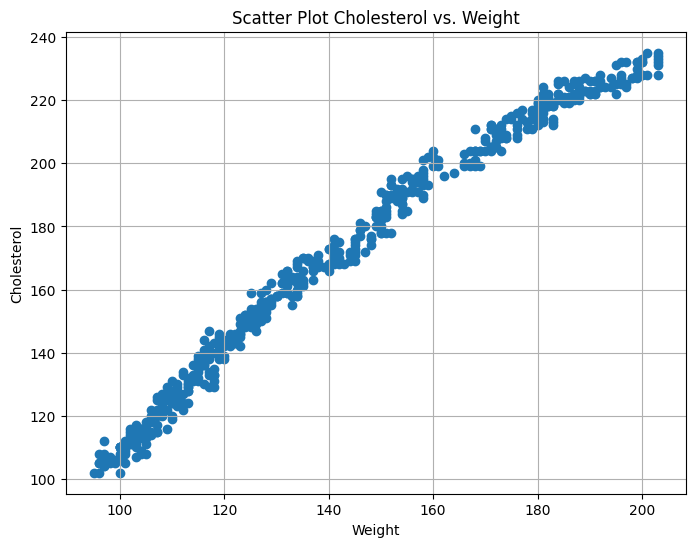

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["Weight"], df["Cholesterol"])
plt.title("Scatter Plot Cholesterol vs. Weight")
plt.xlabel("Weight")
plt.ylabel("Cholesterol")
plt.grid(True)

# Menampilkan plot
plt.show()

## Cholesterol vs Weight
terdapat pola yang berbanding lurus antara kolesterol dan weight
maka dikatakan semakin tinggi berat badan seseorang makin tinggi juga tingkat kolesterolnya

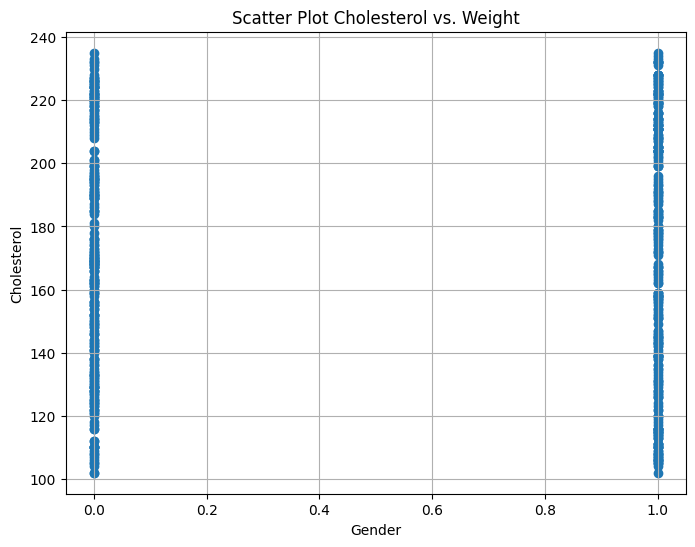

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["Gender"], df["Cholesterol"])
plt.title("Scatter Plot Cholesterol vs. Weight")
plt.xlabel("Gender")
plt.ylabel("Cholesterol")
plt.grid(True)

# Menampilkan plot
plt.show()

## Gender Vs Colestrol

antara laki-laki dan perempuan memiliki kesamaan, berpeluang kolestrol tinggi

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Cholesterol'], **{})
chart

## Analisis Kolestrol

- Normal: Kurang dari 200 mg/dL (miligram per desiliter) atau 5.2 mmol/L (milimol per liter).
- Tidak Normal: 200 mg/dL atau lebih.
- Kolesterol LDL (Low-Density Lipoprotein, disebut juga kolesterol jahat"): Normal: Kurang dari 100 mg/dl. atau 2.6 mmol/L Tidak Normal: 100 mg/dL atau lebih
- Kolesterol HDL (High-Density Lipoprotein, disebut juga "kolesterol baik") Normal (tinggi): 60 mg/dL atau lebih dianggap baik untuk kesehatan jantung Tidak Normal: Kurang dari 40 mg/dl pada pria atau kurang dari 50 mg/dl. pada wanita dianggap rendah.

In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Cholesterol', 'Gender'], **{})
chart

<Figure size 600x600 with 0 Axes>

## Colestrol berdasarkan jumlah nasabah

1.   ada lebih dari 58 nasabah asuransi yang terindentifikasi high colestrol
2.   Item daftar



In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Weight', 'Cholesterol'], **{})
chart

<Figure size 600x600 with 0 Axes>

## colestroll dan wight

1.   ber
2.   Item daftar



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Weight       547 non-null    int64
 1   Cholesterol  547 non-null    int64
 2   Gender       547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [ ]:
df.isnull().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

#Tidak dilakukan........ karena data dalam keadaan bersih dan memiliki tipe data numerik sesuai dengan algoritmanya

##Pemodelan data dengan clustering

# Evaluasi clustering

1. dibutuhkan untuk menentukan berapa nilai K yang akan di input ke dalam n_cluster

2. akan digunaka teknil Elbow methodologi untuk menemukan nilai K yang optimum

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#menentukan input variabel
x=df[['Weight', 'Cholesterol',	'Gender']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

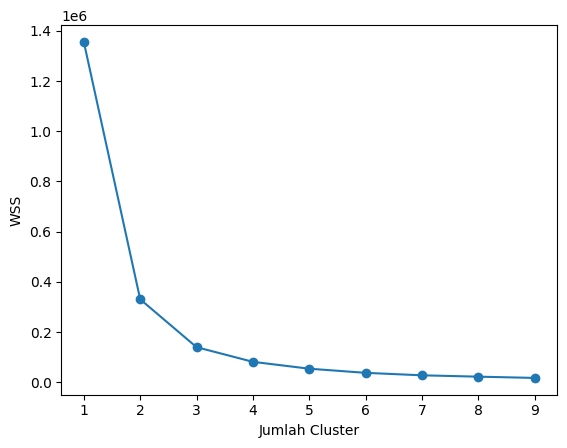

In [ ]:
#elbow method
cluster_range=range(1,10)
cluster_wss=[]

for num_cluster in cluster_range:
  clusters=KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')
plt.show

## ELBOW METHOD
adalah salah satu teknik untuk menentukan n cluster, dimana n adalah nilai terbaik

WSS = Within-Cluster Sum of Squares

nilai n cluster terbaik versi elbow method: 3 sd 4

## Clustering K-Means

In [ ]:
cls=KMeans(n_clusters=4, random_state=0)
#membentuk model
model_cls=cls.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster']=model_cls.labels_
df.head()

,Weight,Cholesterol,Gender,cluster
0,102,111,1,1
1,115,135,1,1
2,115,136,1,1
3,140,167,0,2
4,130,158,1,2


In [ ]:
df['cluster'].value_counts()

1    152
0    147
2    140
3    108
Name: cluster, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x="Weight", y="Cholesterol", color="cluster",
                 size='Weight', hover_data=('Cholesterol'))
fig.show()

## hasil cluster

didapatkan 4 kelompok orang yang beresiki janting koroner. berikut ini kelompok cluser berdasarkan resiko:
1. cluster 0 : cluster high risk : adalah kelompok nasabah yang memiliki resiko tinggi jantung koroner
2. cluster 3 : cluster potentiol high risk: adalah kelompok nasabah yang memiliki kecendrungan resiko tinggi jantung koroner. hak ini ditunjukkan cholesterol dan weight berada pada ambang batas NORMAL
3. Cluster 2: Cluster Moderat, artinya kelompok nasabah yang berada di antara low risk dan potential risk.
4. cluster 1 : cluster low risk, adalah kelompok nasabah yang memiliki resiko rendah, cholesterol rendah dan weight juga rendah

berapakah jumlah nasabah yang akan di prospek untuk mengikuti program baru "TREATMEN" mengurangu resiko jantung koroner?

penjumlahan cluster 0  dan cluster 3:

147 + 109 = 255 nasabah